## Scikit-Learn: Creating Machine Learning Models
- [Scikit-Learn](https://scikit-learn.org/stable/index.html), also referred to as `sklearn`, is an open-source Python machine learning library.

- It's built on top on NumPy (Python library for numerical computing) and Matplotlib (Python library for data visualization).

### A Scikit-Learn Workflow
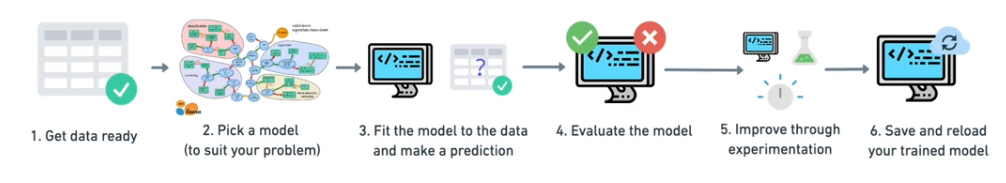

#### Overview
0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

#### An end-to-end Scikit-Learn workflow

##### 1. Get the data ready

In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
# Create X (Features Matrix)
X = heart_disease.drop("target", axis=1)

# Create y (Labels)
y = heart_disease["target"]

In [12]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

# View the data shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((227, 13), (76, 13), (227,), (76,))

##### 2. Choose the right model and hyperparameters

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### 3. Fit the model to the training data
- A model will (attempt to) learn the patterns in a dataset by calling the fit() function on it and passing it the data.

In [14]:

clf.fit(X_train, y_train);

***Once a model has learned patterns in data, you can use them to make a prediction with the predict() function.***

In [15]:
# Make predictions
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [16]:
y_test

285    0
268    0
175    0
280    0
261    0
      ..
22     1
205    0
103    1
59     1
21     1
Name: target, Length: 76, dtype: int64

In [18]:
X_test.loc[205]

age          52.0
sex           1.0
cp            0.0
trestbps    128.0
chol        255.0
fbs           0.0
restecg       1.0
thalach     161.0
exang         1.0
oldpeak       0.0
slope         2.0
ca            1.0
thal          3.0
Name: 205, dtype: float64

In [19]:
heart_disease.loc[205]

age          52.0
sex           1.0
cp            0.0
trestbps    128.0
chol        255.0
fbs           0.0
restecg       1.0
thalach     161.0
exang         1.0
oldpeak       0.0
slope         2.0
ca            1.0
thal          3.0
target        0.0
Name: 205, dtype: float64

In [20]:
# Make a prediction on a single sample (has to be array)
clf.predict(np.array(X_test.loc[205]).reshape(1, -1))

/home/dci-student/Python/A_Self_Study/Machine_Learning_Data_Science_Bootcamp/ml_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

##### 4. Evaluate the Model on the training data and test data
- A trained model/estimator can be evaluated by calling the score() function and passing it a collection of data.

In [25]:
# On the training set
clf.score(X_train, y_train) # score() checks accuracy of the model

1.0

In [24]:
# On the test set (unseen)

clf.score(X_test, y_test)

0.8157894736842105

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.83      0.86      0.84        44

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



In [22]:
confusion_matrix(y_test, y_preds)

array([[24,  8],
       [ 6, 38]])

In [23]:
accuracy_score(y_test, y_preds)

0.8157894736842105

##### 5. Improve the Model
- Try different amount of n_estimators (n_estimators is a hyperparameter you can change)

In [32]:
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f}%")
    print("")


Trying model with 10 estimators...
Model accuracy on test set: 75.00%

Trying model with 20 estimators...
Model accuracy on test set: 81.58%

Trying model with 30 estimators...
Model accuracy on test set: 81.58%

Trying model with 40 estimators...
Model accuracy on test set: 81.58%

Trying model with 50 estimators...
Model accuracy on test set: 80.26%

Trying model with 60 estimators...
Model accuracy on test set: 78.95%

Trying model with 70 estimators...
Model accuracy on test set: 78.95%

Trying model with 80 estimators...
Model accuracy on test set: 80.26%

Trying model with 90 estimators...
Model accuracy on test set: 80.26%



##### 6. Save a model and load it
- A trained model can be exported and saved so it can be imported and used later. One way to save a model is using Python's pickle module.

In [33]:
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb" ))

In [35]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test, y_test)

0.8026315789473685